# Simple Iris Classification with Logistic Regression and KNN

This notebook demonstrates basic classification using two popular algorithms on the famous Iris dataset.

## 1. Import Libraries and Load Data

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", X.shape)
print("Classes:", iris.target_names)

Dataset shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


In [32]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
df.sample(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
111,6.4,2.7,5.3,1.9,2,virginica
38,4.4,3.0,1.3,0.2,0,setosa
18,5.7,3.8,1.7,0.3,0,setosa
110,6.5,3.2,5.1,2.0,2,virginica
137,6.4,3.1,5.5,1.8,2,virginica
12,4.8,3.0,1.4,0.1,0,setosa


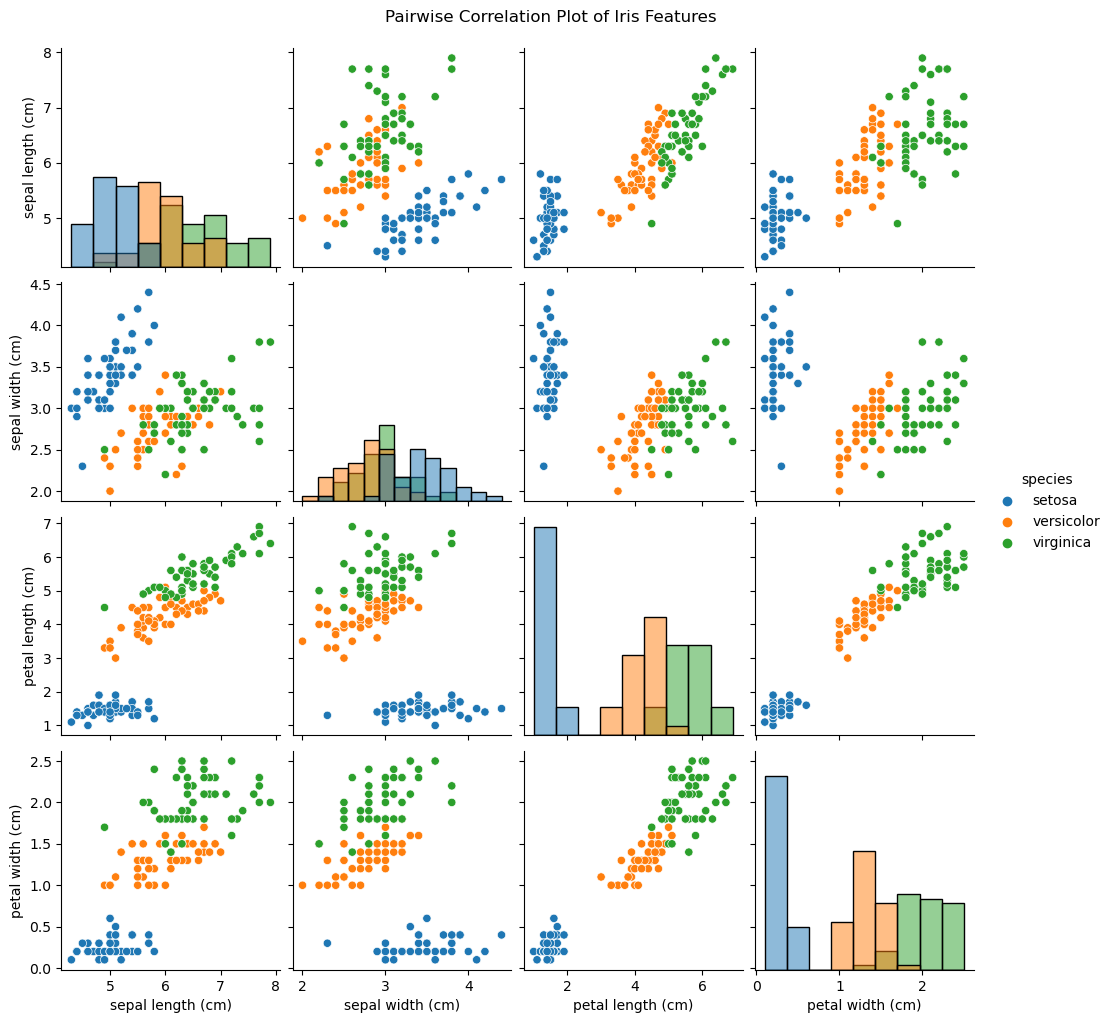

In [33]:
import seaborn as sns

import matplotlib.pyplot as plt

# Only use feature columns for correlation
feature_cols = iris.feature_names
sns.pairplot(df[feature_cols + ['species']], hue='species', diag_kind='hist')
plt.suptitle("Pairwise Correlation Plot of Iris Features", y=1.02)
plt.show()

## 2. Split the Data

In [34]:
# Remove setosa samples (target == 0) from the dataframe and arrays
df_no_setosa = df[df['target'] != 0].reset_index(drop=True)
X_no_setosa = df_no_setosa[feature_cols].values
y_no_setosa = df_no_setosa['target'].values

print("Shape after removing setosa:", X_no_setosa.shape)
print("Classes remaining:", np.unique(y_no_setosa))

X = X_no_setosa
y = y_no_setosa

Shape after removing setosa: (100, 4)
Classes remaining: [1 2]


In [35]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 70
Test set size: 30


## 3. Train Logistic Regression Model

In [36]:
# Create and train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {log_reg_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, log_reg_pred, target_names=iris.target_names[1:]))


Logistic Regression Results:
Accuracy: 0.933

Classification Report:
              precision    recall  f1-score   support

  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [37]:
dir(log_reg)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_prob

In [38]:
log_reg.coef_

array([[ 0.01829775, -0.1324185 ,  2.47002846,  2.22186918]])

In [39]:
log_reg.intercept_

array([-15.58703078])

In [ ]:
# y = mx + b

## 4. Train K-Nearest Neighbors Model

In [40]:
# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("K-Nearest Neighbors Results:")
print(f"Accuracy: {knn_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred, target_names=iris.target_names[1:]))

K-Nearest Neighbors Results:
Accuracy: 0.900

Classification Report:
              precision    recall  f1-score   support

  versicolor       0.93      0.87      0.90        15
   virginica       0.88      0.93      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



## 5. Compare Results

In [41]:
# Create comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors'],
    'Accuracy': [log_reg_accuracy, knn_accuracy]
})

print("Model Comparison:")
print(results)

# Determine which model performed better
best_model = results.loc[results['Accuracy'].idxmax(), 'Model']
best_accuracy = results['Accuracy'].max()

print(f"\nBest performing model: {best_model}")
print(f"Best accuracy: {best_accuracy:.3f}")

Model Comparison:
                 Model  Accuracy
0  Logistic Regression  0.933333
1  K-Nearest Neighbors  0.900000

Best performing model: Logistic Regression
Best accuracy: 0.933


## 6. Make Predictions on New Data (Optional)

In [42]:
# Example: Make predictions on a few sample data points
sample_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Likely setosa
                       [6.2, 2.8, 4.8, 1.8],  # Likely versicolor  
                       [7.2, 3.0, 5.8, 1.6]]) # Likely virginica

print("Sample predictions:")
print("Features: [sepal_length, sepal_width, petal_length, petal_width]")
print()

for i, sample in enumerate(sample_data):
    log_pred = log_reg.predict([sample])[0]
    knn_pred = knn.predict([sample])[0]
    
    print(f"Sample {i+1}: {sample}")
    print(f"  Logistic Regression: {iris.target_names[log_pred]}")
    print(f"  KNN: {iris.target_names[knn_pred]}")
    print()

Sample predictions:
Features: [sepal_length, sepal_width, petal_length, petal_width]

Sample 1: [5.1 3.5 1.4 0.2]
  Logistic Regression: versicolor
  KNN: versicolor

Sample 2: [6.2 2.8 4.8 1.8]
  Logistic Regression: virginica
  KNN: virginica

Sample 3: [7.2 3.  5.8 1.6]
  Logistic Regression: virginica
  KNN: virginica



## Summary

This notebook demonstrates:
1. Loading the classic Iris dataset
2. Splitting data into training and test sets
3. Training two different classification models:
   - **Logistic Regression**: A linear model that uses probability
   - **K-Nearest Neighbors**: A non-parametric model that classifies based on similarity
4. Evaluating and comparing model performance
5. Making predictions on new data

Both models typically perform very well on the Iris dataset since it's a well-separated, clean dataset that's commonly used for learning machine learning concepts.